# Biểu diễn mối quan hệ của lương và kinh nghiệm của nghành IT của các khu vực của Việt Nam.

Câu hỏi: Mức lương của nghành IT của nước ta tăng như thế nào theo kinh nghiệm. Từ đó biết được mức độ phát triển của nghành nhằm để mỗi cá nhân để đưa ra những định hướng công việc của mình sau này.

Để trả lời câu hỏi trên ta sẽ trực quan hoá mức lương theo các mức kinh nghiệm của dữ liệu theo các khu vực. 

Vì việc làm IT tập trung ở các thành phố lớn nên ta sẽ chia làm 3 khu vực là Hà Nội, Hồ Chí Minh, các tỉnh thành khác và tổng quan trên cả nước. 

Kinh nghiệm sẽ gồm các mức là không có kinh nghiệm, dưới một năm, một năm, hai năm và từ 3 năm.

Sau khi xử lý như trên ta sẽ dùng biểu đồ `boxen plot` để có cái nhìn tổng quát nhất về các yếu tố trên từ đó đưa ra kết luận.

### Import các thư viện cần thiết

In [40]:
import pandas as pd
import numpy as np
import warnings
import re 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Đọc dữ liệu từ file `data.csv`.

In [41]:
df = pd.read_csv('data.csv')
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


### Tiền xử lý dữ liệu để trả lời câu hỏi

Tạo một `newdf` là dataframe mới gồm 3 cột là "Salary", 'KinhNghiem', "DiaChi" và xoá các dòng có giá trị Nan để tiền xử lý chuẩn bị cho việc trực quan hoá.

In [42]:
new_df = df[["Salary",'KinhNghiem',"DiaChi"]].dropna()
new_df.head()

,Salary,KinhNghiem,DiaChi
0,"(1200, 1400)",3.0,"Cầu Giấy,Hà Nội"
3,"(600.0, 1200.0)",3.0,"Hà Nội,Nam Từ Liêm"
5,"(600, 700)",3.0,Hà Nội
6,"(600, 800)",0.5,"Hà Nội,Đống Đa"
8,"(1600, 1800)",1.0,"Hà Nội,Cầu Giấy"


Với cột `DiaChi` ta sẽ viết các hàm để chia khu vực dựa trên địa chỉ. Như đã nói ở trên ta sẽ chia ra làm ba khu vực là Hà Nội, TP. Hồ Chí Minh và các tỉnh thành khác.

In [43]:
def checkHaNoi(DiaChi):
    if "Hà Nội" in DiaChi:
        return 1
    return 0
def checkHCM(DiaChi):
    if "Hồ Chí Minh" in DiaChi:
        return 1
    return 0
def check(DiaChi):
    a = 'An Giang,Kon Tum,Bà Rịa-Vũng Tàu,Lai Châu,Bắc Giang,Lâm Đồng,Bắc Kạn,Lạng Sơn,Bạc Liêu,Lào Cai,Bắc Ninh,Long An,Bến Tre,Nam Định,Bình Định,Nghệ An,Bình Dương,Ninh Bình,Bình Phước,Ninh Thuận,Bình Thuận,Phú Thọ,Cà Mau,Phú Yên,Cần Thơ,Quảng Bình,Cao Bằng,Quảng Nam,Đà Nẵng,Quảng Ngãi,Đắk Lắk,Quảng Ninh,Đắk Nông,Quảng Trị,Điện Biên,Sóc Trăng,Đồng Nai,Sơn La,Đồng Tháp,Tây Ninh,Gia Lai,Thái Bình,Hà Giang,Thái Nguyên,Hà Nam,Thanh Hóa,Thừa Thiên Huế,Hà Tĩnh,Tiền Giang,Hải Dương,Hải Phòng,Trà Vinh,Hậu Giang,Tuyên Quang,Hòa Bình,Vĩnh Long,Hưng Yên,Vĩnh Phúc,Khánh Hòa,Yên Bái,Kiên Giang'
    a = a.split(',')
    for i in a:
        if i in DiaChi:
            return 1
    return 0

In [44]:
new_df["HaNoi"] = new_df["DiaChi"].apply(checkHaNoi)
new_df["TP.HCM"] = new_df["DiaChi"].apply(checkHCM)
new_df["Khac"] = new_df["DiaChi"].apply(check)
new_df = new_df.drop(columns = "DiaChi")
new_df.head()

,Salary,KinhNghiem,HaNoi,TP.HCM,Khac
0,"(1200, 1400)",3.0,1,0,0
3,"(600.0, 1200.0)",3.0,1,0,0
5,"(600, 700)",3.0,1,0,0
6,"(600, 800)",0.5,1,0,0
8,"(1600, 1800)",1.0,1,0,0


Với cột `Salary` thì nó có dạng string và thể hiện khoảng lương có thể trả cho vị trí đó của các nhà tuyển dụng.

Để có thể trực quan hoá bằng số liệu cụ thể thì ta sẽ đưa nó về mức lương trung bình là trung bình cộng của mức lương cao nhất và mức lương thấp nhất mà nhà tuyển dụng đưa ra. Những mức lương trên 5000 USD/Tháng rất ít nên để dễ dàng trong việc thống kê thì ta sẽ đưa nó về mức 5000 sẽ là cao nhất.

In [45]:
def avg_Salary(salary):
    salary = salary.replace("(",'').replace(")",'').replace(" ",'')
    salary = salary.split(',')
    a = (float(salary[0])+float(salary[1]))/2
    if a > 5000:
        return 5000
    return (float(salary[0])+float(salary[1]))/2

In [46]:
new_df["Salary"] = new_df["Salary"].apply(avg_Salary)
new_df.head()

,Salary,KinhNghiem,HaNoi,TP.HCM,Khac
0,1300.0,3.0,1,0,0
3,900.0,3.0,1,0,0
5,650.0,3.0,1,0,0
6,700.0,0.5,1,0,0
8,1700.0,1.0,1,0,0


Với cột `KinhNghiem` thì ta sẽ chia ra làm các mốc như trên gồm không có kinh nghiệm, dưới một năm, một năm, hai năm và từ 3 năm (tương tự được biểu diễn trên dữ liệu là ['0', '0.5', '1', '2', '3']).

In [47]:
def KinhNghiem(KN):
    if KN >=3:
        return '3'
    if KN == 0.5:
        return '0.5'
    return str(int(KN))

In [48]:
new_df['KinhNghiem'] = new_df['KinhNghiem'].apply(KinhNghiem)
new_df.head()

,Salary,KinhNghiem,HaNoi,TP.HCM,Khac
0,1300.0,3,1,0,0
3,900.0,3,1,0,0
5,650.0,3,1,0,0
6,700.0,0.5,1,0,0
8,1700.0,1,1,0,0


### Trực quan hoá dữ liệu và đưa ra kết luận

Ta sẽ dùng biểu đồ `boxen plot` để trực quan hoá các dữ kiện trên.

Ta sẽ trực quan hoá các khu vực theo mốc kinh nghiệm như đã xử lý ở trên. Đồng thời tính giá trị trung bình của lương theo các mốc để có thể thấy rõ sự thăng tiến rõ ràng của mức lương.

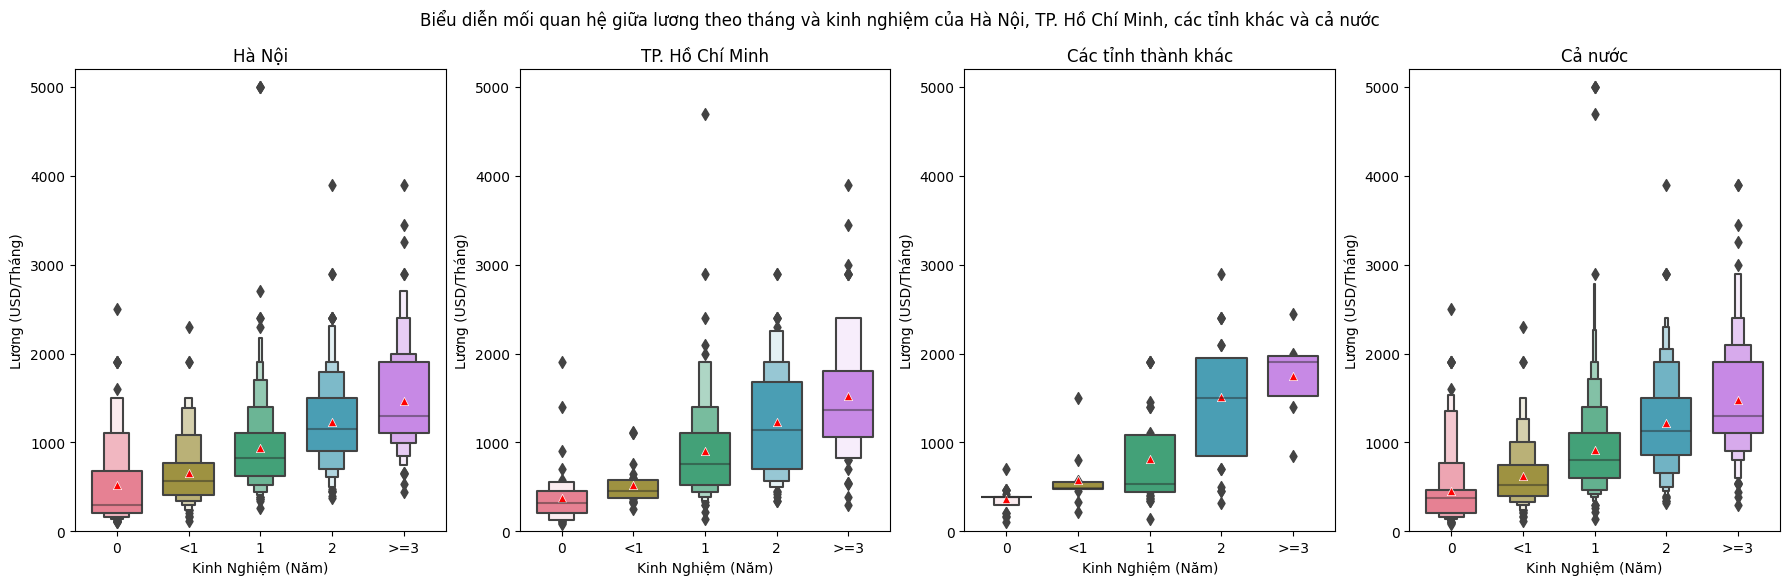

In [49]:
fig, ax = plt.subplots(nrows= 1, ncols=4, figsize = (22,6))
plt.suptitle("Biểu diễn mối quan hệ giữa lương theo tháng và kinh nghiệm của Hà Nội, TP. Hồ Chí Minh, các tỉnh khác và cả nước")
col = ["HaNoi", "TP.HCM", "Khac"]
col1 = ["Hà Nội", "TP. Hồ Chí Minh", "Các tỉnh thành khác"]
for i in range(len(col)):
    sns.boxenplot(ax = ax[i], data = new_df[new_df[col[i]]==1], x = "KinhNghiem", y = "Salary", order = ['0', '0.5', '1','2', '3'], palette= 'husl',width = 0.7)
    sns.scatterplot(ax = ax[i], data = new_df[new_df[col[i]]==1].groupby('KinhNghiem')['Salary'].mean(),marker='^',color = 'red')
    ax[i].set_title(col1[i])
    ax[i].set_xticklabels(['0', '<1', '1','2', '>=3'])
    ax[i].set_xlabel("Kinh Nghiệm (Năm)")
    ax[i].set_ylabel("Lương (USD/Tháng)")
    ax[i].set_ylim(0,5200)
sns.boxenplot(ax = ax[3], data = new_df, x = "KinhNghiem", y = "Salary", order = ['0', '0.5', '1','2', '3'], palette= 'husl', width = 0.7)
sns.scatterplot(ax = ax[3], data=new_df.groupby('KinhNghiem')['Salary'].mean(),marker='^',color = 'red')    
ax[3].set_title("Cả nước")
ax[3].set_xticklabels(['0', '<1', '1','2', '>=3'])
ax[3].set_xlabel("Kinh Nghiệm (Năm)")
ax[3].set_ylabel("Lương (USD/Tháng)")
ax[3].set_ylim(0,5200)
plt.show()

Kết luận: 
- Mức lương có sự tăng rất tốt theo kinh nghiệm của các khu vực. 
- Sự phân bố của mức lương giữa các khu vực thì không có sự chêch lệch quá lớn so với các khu vực khác và với cả nước.
- Ta thấy mức lương của nghành IT khá cao so với mặc bằng chung so với các nghành khác và tăng khá nhanh và mạnh. 

- Ở mức không và dưới một năm kinh nghiệm thì có vẻ lương ở Hà Nội cao hơn so với các khu vực khác ở cùng mức kinh nghiệm đó.
- Ở mức từ một năm kinh nghiệm trở đi thì các khu vực có sự phân bố lương gần như rất đồng đều. Có lẻ với mức kinh nghiệm cao thì mức độ đãi ngộ giữa các khu vực không có sự khác biệt nhiều.
- Có một số dữ liệu cho ta thấy mức lương ở mức kinh nghiệm thấp hơn lại cao nổi trội hơn các mức kinh nghiệm cao. Có lẻ những công việc này có đặc thù gì đó và yêu cầu đặc biệt nên đãi ngộ tốt hơn so với mặt bằng chung của nghành IT.
- Với hơn 3 năm kinh nghiệm thì ta có thể có mức lương trung bình tầm 2000 USD/tháng thể hiện sự đãi ngộ rất tốt của nghành này với những người có kinh nghiệm. 

Nhìn chung thì mức lương của nghành IT có vẻ khá ổn. Để có được mức lương tốt thì đồng thời nó cũng yêu cầu khá nhiều kĩ năng cần có ở một người làm trong nghành này. 